## Standard Multidimensional Gaussian Distribution

### Preparing the data

Generating 40 datapoints from the distribution $N(\left( \begin{array}{c} 2 \\ 2 \end{array}\right),\left( \begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right))$.  

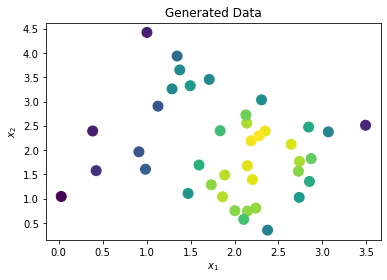

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

Dataset = []
for _ in range(0,40):
    Dataset.append(list(np.random.default_rng().normal(2, 1, 2)))

x1 = [p[0] for p in Dataset]
x2 = [p[1] for p in Dataset]
x1x2 = np.vstack([x1,x2])
z = gaussian_kde(x1x2)(x1x2)
plt.scatter(x1, x2, c=z, s=100)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Generated Data")
plt.show()

### Generating the likelihood function

/var/folders/sn/xtxyc9q57g94hd9p4mx0nfb80000gn/T/ipykernel_96061/695703908.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


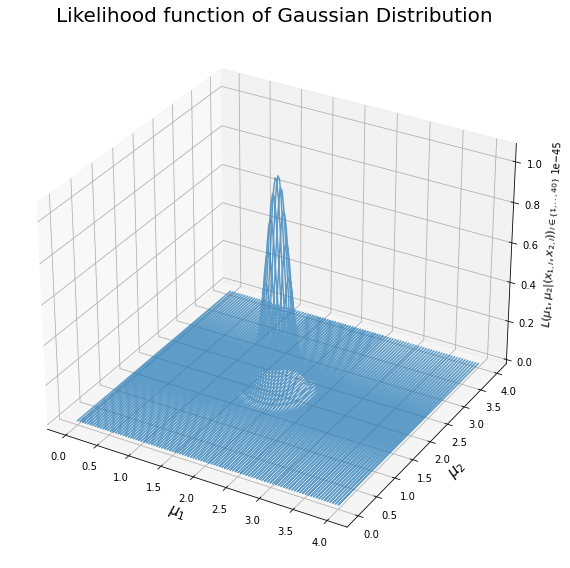

In [13]:
from MCMC_DianZhang.Dian_BayesianInference.Dian_BayesianInference.StandardGaussianLikeli import Likelihood_StandardGaussian

Likeli = Likelihood_StandardGaussian(Dim=2, Dataset=Dataset)
Grid = np.linspace(0, 4, 100)
x = []
y = []
z = []
r = len(Grid)
for g in Grid:
    y += list(Grid)
    x += [g]*r
    z += [Likeli.L([g, k]) for k in Grid]
fig = plt.figure(figsize=(8, 8), facecolor="white")
Gau = fig.add_subplot(projection="3d")
Gau.plot(x, y, z, alpha=0.7)
Gau.set_xlabel("$\mu_1$", fontsize=15)
Gau.set_ylabel("$\mu_2$", fontsize=15)
Gau.set_zlabel("$L(\mu_1, \mu_2| {(x_{1,i}, x_{2,i})})_{i \in \{1,..,40\}}$", fontsize=11)
Gau.set_title("Likelihood function of Gaussian Distribution", fontsize=20)
fig.tight_layout()
fig.show()

### Metropolis-Hasting MCMC algorithm

#### Uniform Proposal distribution

In [14]:
from MCMC_DianZhang.Dian_MCMC.MetropolisHastingMCMC.MHMC import MHMC
from MCMC_DianZhang.Dian_MCMC.MetropolisHastingMCMC.ProposalDistributions import UniformProposalDistribution, GausianProposalDistribution
q = UniformProposalDistribution(radius=0.14, Dim=2)
MetropolisHasting = MHMC(rho=Likeli.L)
Theta, accpetanceRate = MetropolisHasting.generate(theta0=[0,0], qProb=q.qProb, qSamp=q.qSample, steps=3000, OutputAcceptanceRate = True)

Acceptance rate of the MHMCMC Algorithm with Uniform Proposal Distribution = 0.712


/var/folders/sn/xtxyc9q57g94hd9p4mx0nfb80000gn/T/ipykernel_96061/4027313745.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


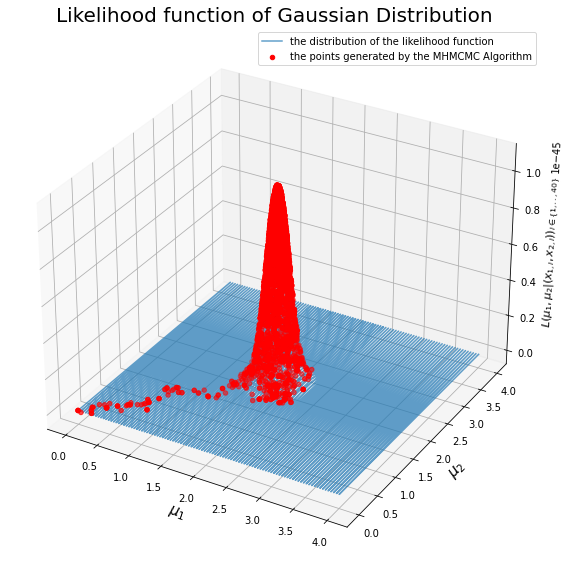

In [15]:
print(f"Acceptance rate of the MHMCMC Algorithm with Uniform Proposal Distribution = {accpetanceRate:.3f}")

fig = plt.figure(figsize=(8, 8), facecolor="white")
Gau = fig.add_subplot(projection="3d")
Gau.plot(x, y, z, alpha=0.7, label="the distribution of the likelihood function")
Gau.scatter([theta[0] for theta in Theta], [theta[1] for theta in Theta], [Likeli.L(theta) for theta in Theta], color="red", label="the points generated by the MHMCMC Algorithm")
Gau.legend()
Gau.set_xlabel("$\mu_1$", fontsize=15)
Gau.set_ylabel("$\mu_2$", fontsize=15)
Gau.set_zlabel("$L(\mu_1, \mu_2| {(x_{1,i}, x_{2,i})})_{i \in \{1,..,40\}}$", fontsize=11)
Gau.set_title("Likelihood function of Gaussian Distribution", fontsize=20)
fig.tight_layout()
fig.show()

#### Gaussian Proposal distribution

In [16]:
q = GausianProposalDistribution(sd=0.2, Dim=2)
MetropolisHasting = MHMC(rho=Likeli.L)
Theta, accpetanceRate = MetropolisHasting.generate(theta0=[0,0], qProb=q.qProb, qSamp=q.qSample, steps=3000, OutputAcceptanceRate = True)

Acceptance rate of the MHMCMC Algorithm with Gaussian Proposal Distribution = 0.473


/var/folders/sn/xtxyc9q57g94hd9p4mx0nfb80000gn/T/ipykernel_96061/4175788883.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


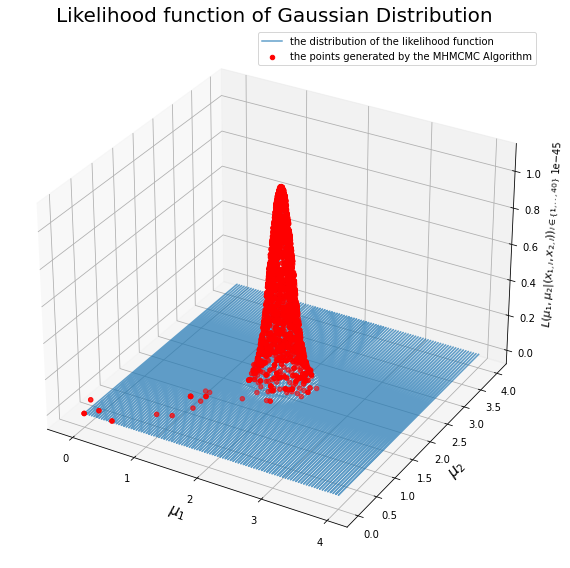

In [17]:
print(f"Acceptance rate of the MHMCMC Algorithm with Gaussian Proposal Distribution = {accpetanceRate:.3f}")

fig = plt.figure(figsize=(8, 8), facecolor="white")
Gau = fig.add_subplot(projection="3d")
Gau.plot(x, y, z, alpha=0.7, label="the distribution of the likelihood function")
Gau.scatter([theta[0] for theta in Theta], [theta[1] for theta in Theta], [Likeli.L(theta) for theta in Theta], color="red", label="the points generated by the MHMCMC Algorithm")
Gau.legend()
Gau.set_xlabel("$\mu_1$", fontsize=15)
Gau.set_ylabel("$\mu_2$", fontsize=15)
Gau.set_zlabel("$L(\mu_1, \mu_2| {(x_{1,i}, x_{2,i})})_{i \in \{1,..,40\}}$", fontsize=11)
Gau.set_title("Likelihood function of Gaussian Distribution", fontsize=20)
fig.tight_layout()
fig.show()

## General Multidimensional Gaussian Distribution

### Preparing the data 

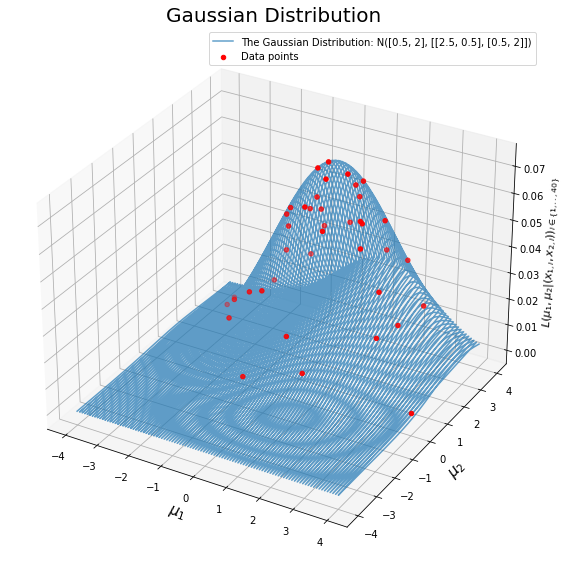

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

mean = [0.5,2]
Sigma = [[2.5,0.5], [0.5,2]]
multiNormal = multivariate_normal(mean=mean, cov=Sigma)
Dataset = []
for _ in range(0,40):
    Dataset.append(list(np.random.default_rng().multivariate_normal(mean, Sigma, 1)[0]))
Grid = np.linspace(-4, 4, 100)
x = []
y = []
z = []
r = len(Grid)
for g in Grid:
    y += list(Grid)
    x += [g]*r
    z += [multiNormal.pdf([g, k]) for k in Grid]
fig = plt.figure(figsize=(8, 8), facecolor="white")
Gau = fig.add_subplot(projection="3d")
Gau.plot(x, y, z, alpha=0.7, label=f"The Gaussian Distribution: N({mean}, {Sigma})")
Gau.scatter([x[0] for x in Dataset], [x[1] for x in Dataset], [multiNormal.pdf(x) for x in Dataset], color="red", label="Data points")
Gau.legend()
Gau.set_xlabel("$\mu_1$", fontsize=15)
Gau.set_ylabel("$\mu_2$", fontsize=15)
Gau.set_zlabel("$L(\mu_1, \mu_2| {(x_{1,i}, x_{2,i})})_{i \in \{1,..,40\}}$", fontsize=11)
Gau.set_title("Gaussian Distribution", fontsize=20)
fig.tight_layout()

### Generating Likelihood function

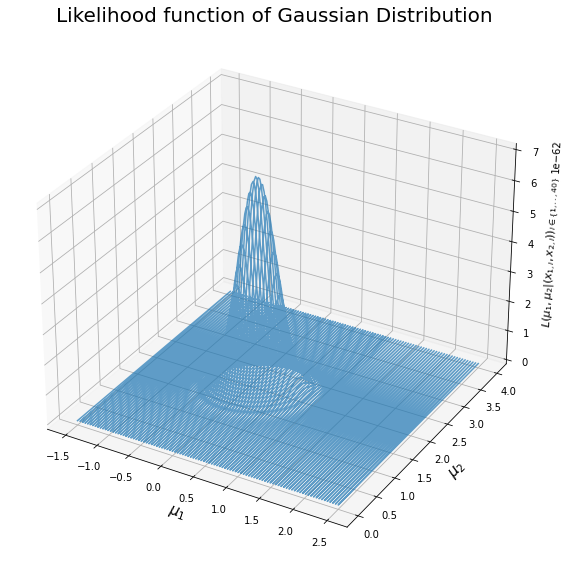

In [24]:
from MCMC_DianZhang.Dian_BayesianInference.Dian_BayesianInference.MultiGaussianLikeli import Likelihood_MultidimensionalGaussian
Likeli = Likelihood_MultidimensionalGaussian(Dim=2, Sigma=Sigma, Dataset=Dataset)
Grid = np.linspace(-2, 2, 100)
x = []
y = []
z = []
r = len(Grid)
for g in Grid:
    y += list(Grid+mean[1])
    x += [g+mean[0]]*r
    z += [Likeli.L([g+mean[0], k+mean[1]]) for k in Grid]
fig = plt.figure(figsize=(8, 8), facecolor="white")
Gau = fig.add_subplot(projection="3d")
Gau.plot(x, y, z, alpha=0.7)
Gau.set_xlabel("$\mu_1$", fontsize=15)
Gau.set_ylabel("$\mu_2$", fontsize=15)
Gau.set_zlabel("$L(\mu_1, \mu_2| {(x_{1,i}, x_{2,i})})_{i \in \{1,..,40\}}$", fontsize=11)
Gau.set_title("Likelihood function of Gaussian Distribution", fontsize=20)
fig.tight_layout()

### Metropolis-Hasting MCMC algorithm

#### Uniform Proposal distribution

In [5]:
from MCMC_DianZhang.Dian_MCMC.MetropolisHastingMCMC.MHMC import MHMC
from MCMC_DianZhang.Dian_MCMC.MetropolisHastingMCMC.ProposalDistributions import UniformProposalDistribution, GausianProposalDistribution
q = UniformProposalDistribution(radius=0.14, Dim=2)
MetropolisHasting = MHMC(rho=Likeli.L)
Theta, accpetanceRate = MetropolisHasting.generate(theta0=[0,0], qProb=q.qProb, qSamp=q.qSample, steps=3000, OutputAcceptanceRate = True)

Acceptance rate of the MHMCMC Algorithm with Uniform Proposal Distribution = 0.805
The Elective Sample Size of all outputs of the Metropolis-Hasting MCMC Algorithm for 3001 steps = [45.77464916 71.79390019]
The Elective Sample Size of the first half outputs of the Metropolis-Hasting MCMC Algorithm for 3001 steps = [21.4164142  32.82096334]
The Elective Sample Size of the second half outputs of the Metropolis-Hasting MCMC Algorithm for 3001 steps = [46.6900562  46.88694043]


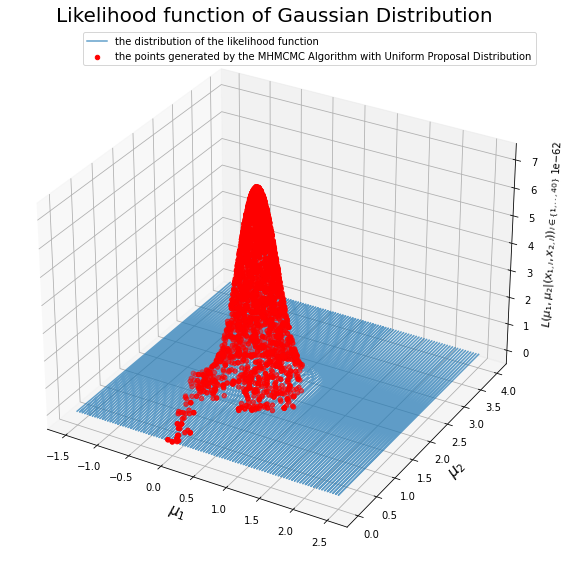

In [6]:
from MCMC_DianZhang.Dian_MCMC.Statistic_tools import auto_correlation, ESS
print(f"Acceptance rate of the MHMCMC Algorithm with Uniform Proposal Distribution = {accpetanceRate:.3f}")
print(f"The Elective Sample Size of all outputs of the Metropolis-Hasting MCMC Algorithm for {len(Theta)} steps = {ESS(thetas=Theta)}")
print(f"The Elective Sample Size of the first half outputs of the Metropolis-Hasting MCMC Algorithm for {len(Theta)} steps = {ESS(thetas=Theta[0:len(Theta)//2])}")
print(f"The Elective Sample Size of the second half outputs of the Metropolis-Hasting MCMC Algorithm for {len(Theta)} steps = {ESS(thetas=Theta[len(Theta)//2:-1])}")

fig = plt.figure(figsize=(8, 8), facecolor="white")
Gau = fig.add_subplot(projection="3d")
Gau.plot(x, y, z, alpha=0.7, label="the distribution of the likelihood function")
Gau.scatter([theta[0] for theta in Theta], [theta[1] for theta in Theta], [Likeli.L(theta) for theta in Theta], color="red", label="the points generated by the MHMCMC Algorithm with Uniform Proposal Distribution")
Gau.legend()
Gau.set_xlabel("$\mu_1$", fontsize=15)
Gau.set_ylabel("$\mu_2$", fontsize=15)
Gau.set_zlabel("$L(\mu_1, \mu_2| {(x_{1,i}, x_{2,i})})_{i \in \{1,..,40\}}$", fontsize=11)
Gau.set_title("Likelihood function of Gaussian Distribution", fontsize=20)
fig.tight_layout()

#### Gaussian Proposal Distribution

In [7]:
q = GausianProposalDistribution(sd=0.2, Dim=2)
MetropolisHasting = MHMC(rho=Likeli.L)
Theta, accpetanceRate = MetropolisHasting.generate(theta0=[0,0], qProb=q.qProb, qSamp=q.qSample, steps=3000, OutputAcceptanceRate = True)

Acceptance rate of the MHMCMC Algorithm with Gaussian Proposal Distribution = 0.594
The Elective Sample Size of all outputs of the Metropolis-Hasting MCMC Algorithm for 3001 steps = [246.07947525 214.33518358]
The Elective Sample Size of the first half outputs of the Metropolis-Hasting MCMC Algorithm for 3001 steps = [111.10146542  96.21426168]
The Elective Sample Size of the second half outputs of the Metropolis-Hasting MCMC Algorithm for 3001 steps = [142.92633178 140.10553966]


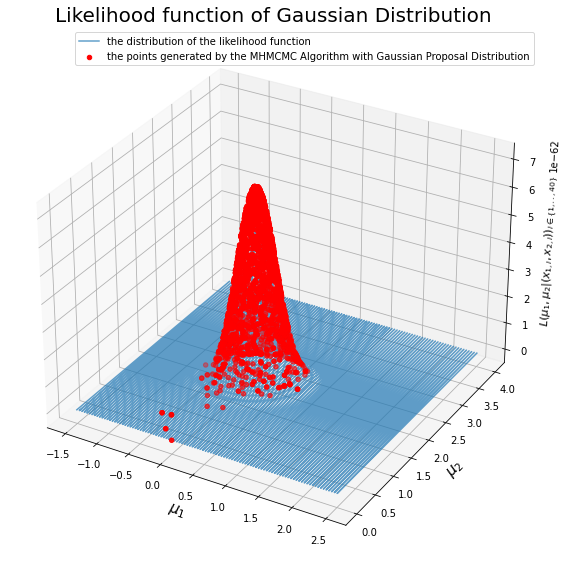

In [8]:
print(f"Acceptance rate of the MHMCMC Algorithm with Gaussian Proposal Distribution = {accpetanceRate:.3f}")
print(f"The Elective Sample Size of all outputs of the Metropolis-Hasting MCMC Algorithm for {len(Theta)} steps = {ESS(thetas=Theta)}")
print(f"The Elective Sample Size of the first half outputs of the Metropolis-Hasting MCMC Algorithm for {len(Theta)} steps = {ESS(thetas=Theta[0:len(Theta)//2])}")
print(f"The Elective Sample Size of the second half outputs of the Metropolis-Hasting MCMC Algorithm for {len(Theta)} steps = {ESS(thetas=Theta[len(Theta)//2:-1])}")
fig = plt.figure(figsize=(8, 8), facecolor="white")
Gau = fig.add_subplot(projection="3d")
Gau.plot(x, y, z, alpha=0.7, label="the distribution of the likelihood function")
Gau.scatter([theta[0] for theta in Theta], [theta[1] for theta in Theta], [Likeli.L(theta) for theta in Theta], color="red", label="the points generated by the MHMCMC Algorithm with Gaussian Proposal Distribution")
Gau.legend()
Gau.set_xlabel("$\mu_1$", fontsize=15)
Gau.set_ylabel("$\mu_2$", fontsize=15)
Gau.set_zlabel("$L(\mu_1, \mu_2| {(x_{1,i}, x_{2,i})})_{i \in \{1,..,40\}}$", fontsize=11)
Gau.set_title("Likelihood function of Gaussian Distribution", fontsize=20)
fig.tight_layout()